# **Multi-class Prediction of Obesity Risk**

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition. The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

## The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)


## The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)


Variables obtained : Gender, Age, Height and Weight.


## NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

In [1]:
# import libraries for working with data
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [3]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [5]:
# check for missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
# check for duplicates
train.duplicated().sum()

0

In [7]:
# check for missing values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [8]:
# check for duplicates
test.duplicated().sum()

0

In [9]:
# rename columns for better readability
new_names = {
    "Gender": "gender",
    "Age": "age",
    "Height": "height",
    "Weight": "weight",
    "family_history_with_overweight": "fam_overweight_hist",
    "FAVC": "f_high_calory_consum",
    "FCVC": "fof_vegetable_consum",
    "NCP": "n_of_main_meals",
    "CAEC": "food_between_meals",
    "SMOKE": "smoke",
    "CH2O": "daily_water",
    "SCC": "calorie_monitoring",
    "FAF": "fof_physical_act",
    "TUE": "time_using_devices",
    "CALC": "alcohol_consum",
    "MTRANS": "transportation",
    "NObeyesdad" : "target"
}
datasets = [train, test]
for data in datasets:
    data.rename(columns = new_names, inplace = True)

In [10]:
train.describe(include = "all")

,id,gender,age,height,weight,fam_overweight_hist,f_high_calory_consum,fof_vegetable_consum,n_of_main_meals,food_between_meals,smoke,daily_water,calorie_monitoring,fof_physical_act,time_using_devices,alcohol_consum,transportation,target
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [11]:
test.describe(include = "all")

,id,gender,age,height,weight,fam_overweight_hist,f_high_calory_consum,fof_vegetable_consum,n_of_main_meals,food_between_meals,smoke,daily_water,calorie_monitoring,fof_physical_act,time_using_devices,alcohol_consum,transportation
count,13840.000000,13840,13840.000000,13840.000000,13840.000000,13840,13840,13840.000000,13840.000000,13840,13840,13840.000000,13840,13840.000000,13840.000000,13840,13840
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation
freq,NaN,6965,NaN,NaN,NaN,11384,12583,NaN,NaN,11689,13660,NaN,13376,NaN,NaN,9979,11111
mean,27677.500000,NaN,23.952740,1.698934,87.384504,NaN,NaN,2.442898,2.750610,NaN,NaN,2.032044,NaN,0.974532,0.611033,NaN,NaN
std,3995.408198,NaN,5.799814,0.088761,26.111819,NaN,NaN,0.531606,0.710927,NaN,NaN,0.611230,NaN,0.840361,0.608005,NaN,NaN
min,20758.000000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,24217.750000,NaN,20.000000,1.631662,65.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.771781,NaN,0.001086,0.000000,NaN,NaN
50%,27677.500000,NaN,22.906342,1.700000,83.952968,NaN,NaN,2.358087,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.552498,NaN,NaN
75%,31137.250000,NaN,26.000000,1.760710,111.157811,NaN,NaN,3.000000,3.000000,NaN,NaN,2.552388,NaN,1.571865,1.000000,NaN,NaN


In [12]:
# def function to display count and percentages pie chart for categorical variables
def get_graph(column, df, title, order = None):
    if order == None:
        order = df[column].unique().tolist()
    colors = sns.color_palette("flare", n_colors=len(order))
    plt.figure(figsize = (15, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y = column, data = df, order = order, palette = colors)
    plt.title(title)

    plt.subplot(1, 2, 2)
    plt.pie(x = df[column].value_counts(normalize = True)[order], labels = order, autopct='%1.1f%%', colors = colors)
    plt.title(title)
    plt.show()

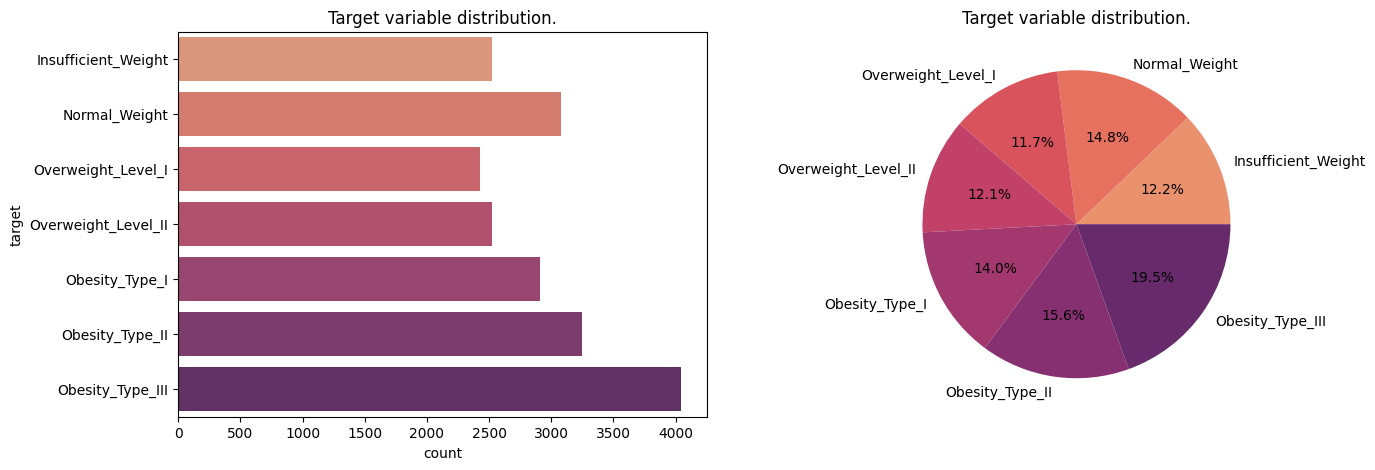

In [13]:
order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
get_graph("target", train, "Target variable distribution.", order = order)

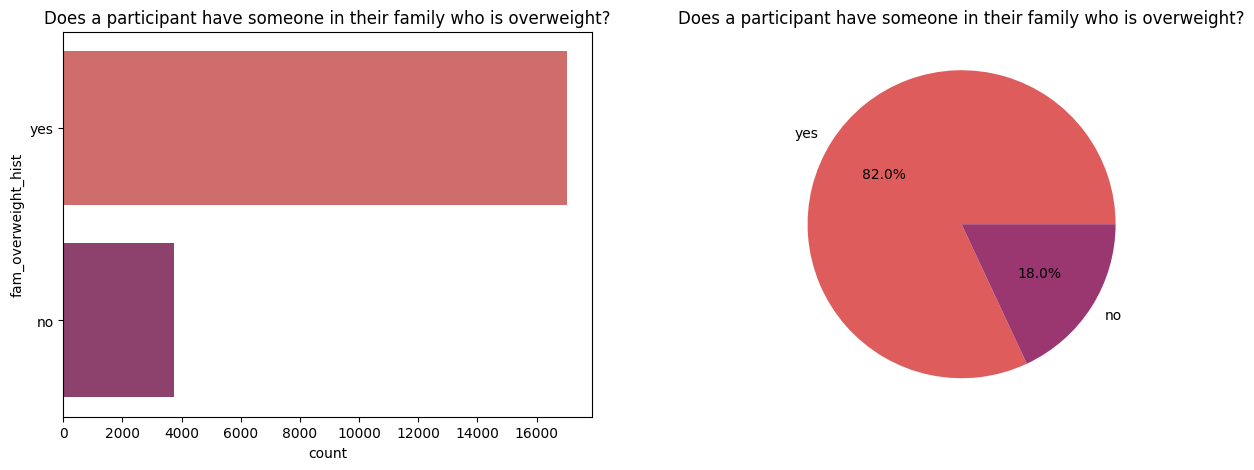

In [14]:
get_graph("fam_overweight_hist", train, "Does a participant have someone in their family who is overweight?")

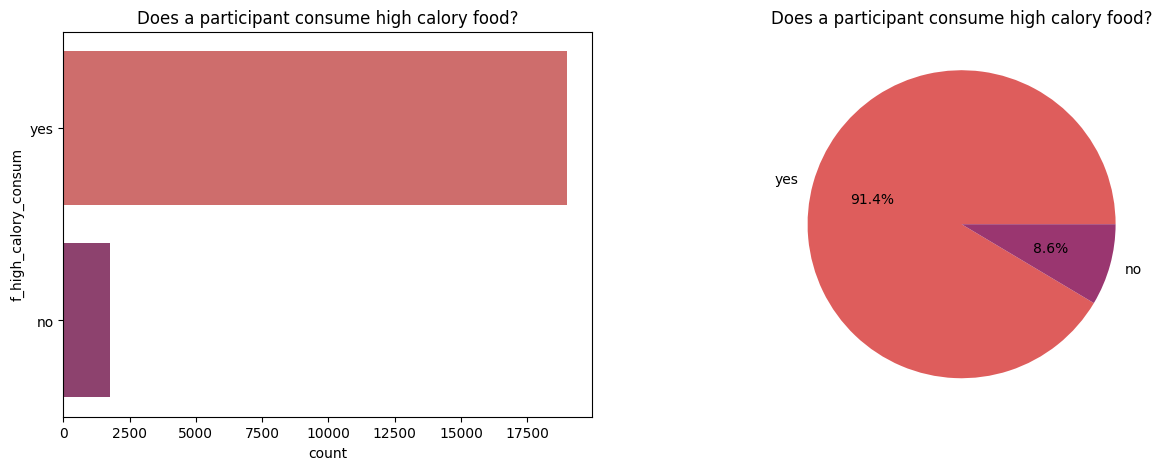

In [15]:
get_graph("f_high_calory_consum", train, "Does a participant consume high calory food?")

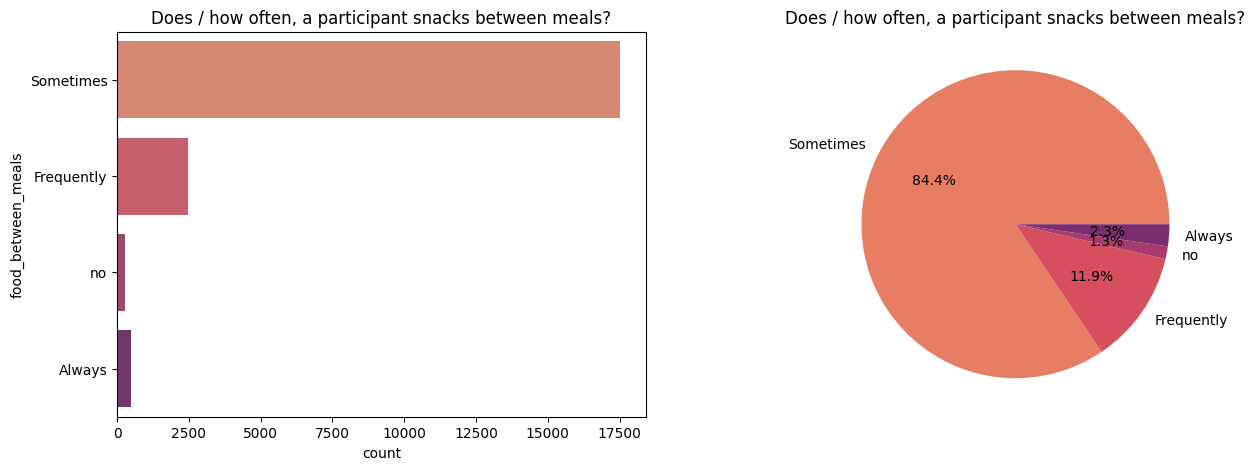

In [16]:
get_graph("food_between_meals", train, "Does / how often, a participant snacks between meals?")

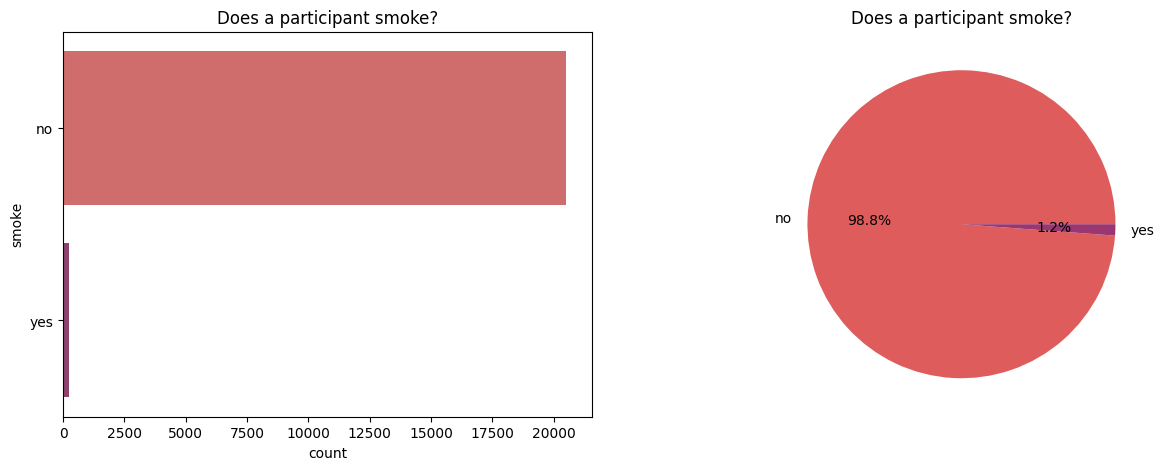

In [17]:
get_graph("smoke", train, "Does a participant smoke?")

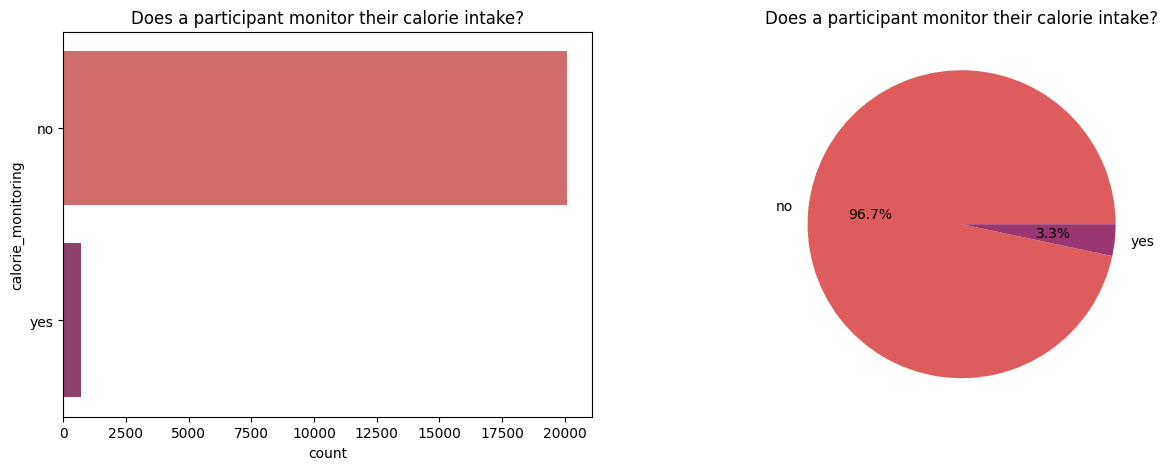

In [18]:
get_graph("calorie_monitoring", train, "Does a participant monitor their calorie intake?")

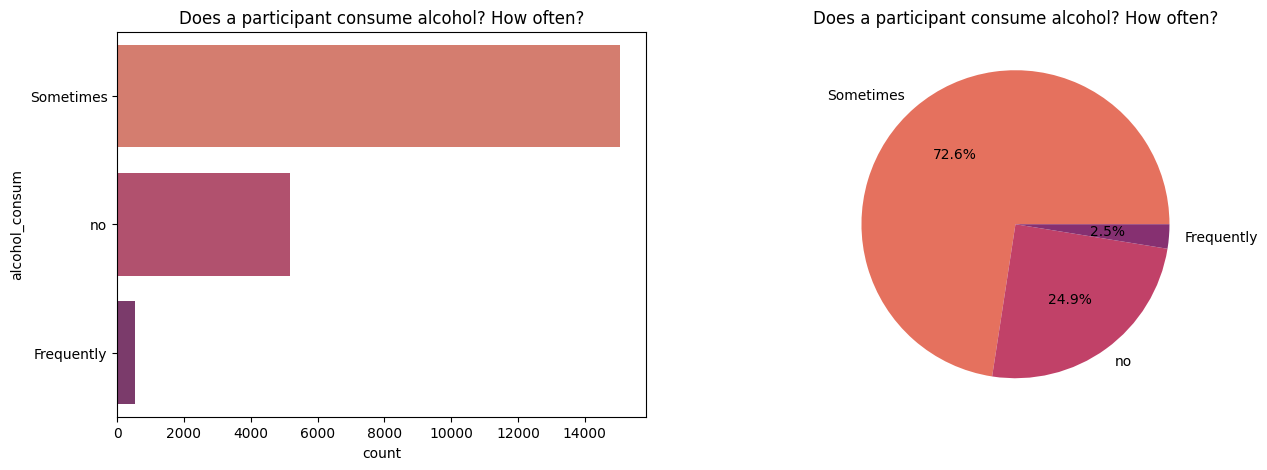

In [19]:
get_graph("alcohol_consum", train, "Does a participant consume alcohol? How often?")

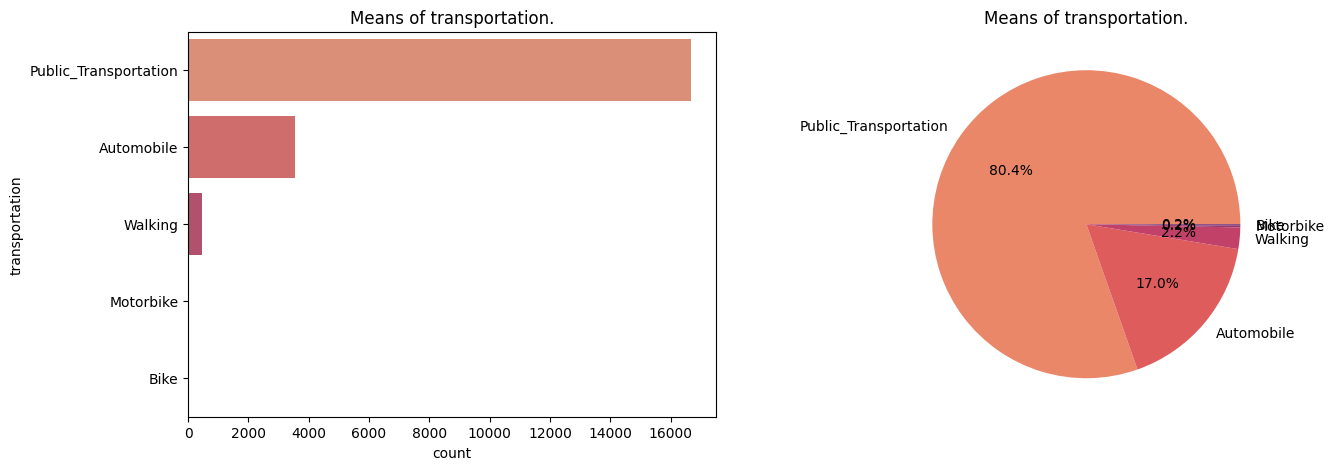

In [20]:
get_graph("transportation", train, "Means of transportation.")

In [21]:
def plot_kde_for_numerical(df):
    # Get the numerical columns
    numerical_columns = df.select_dtypes(include = "number").columns

    # Create a KDE plot for each numerical column except "id"
    plt.figure(figsize=(20, 15))
    x = 1
    for column in numerical_columns:
        if column == "id":
            pass
        else:
            plt.subplot(3, 3, x)
            sns.kdeplot(data=df[column], shade=True, color = "purple")
            sns.kdeplot(data=test[column], shade=True, color = "blue")
            plt.xlabel(column)
            plt.ylabel("Density")
            plt.title(f"Kernel Density Estimate Plot for {column}")
            x += 1
            
    plt.show()

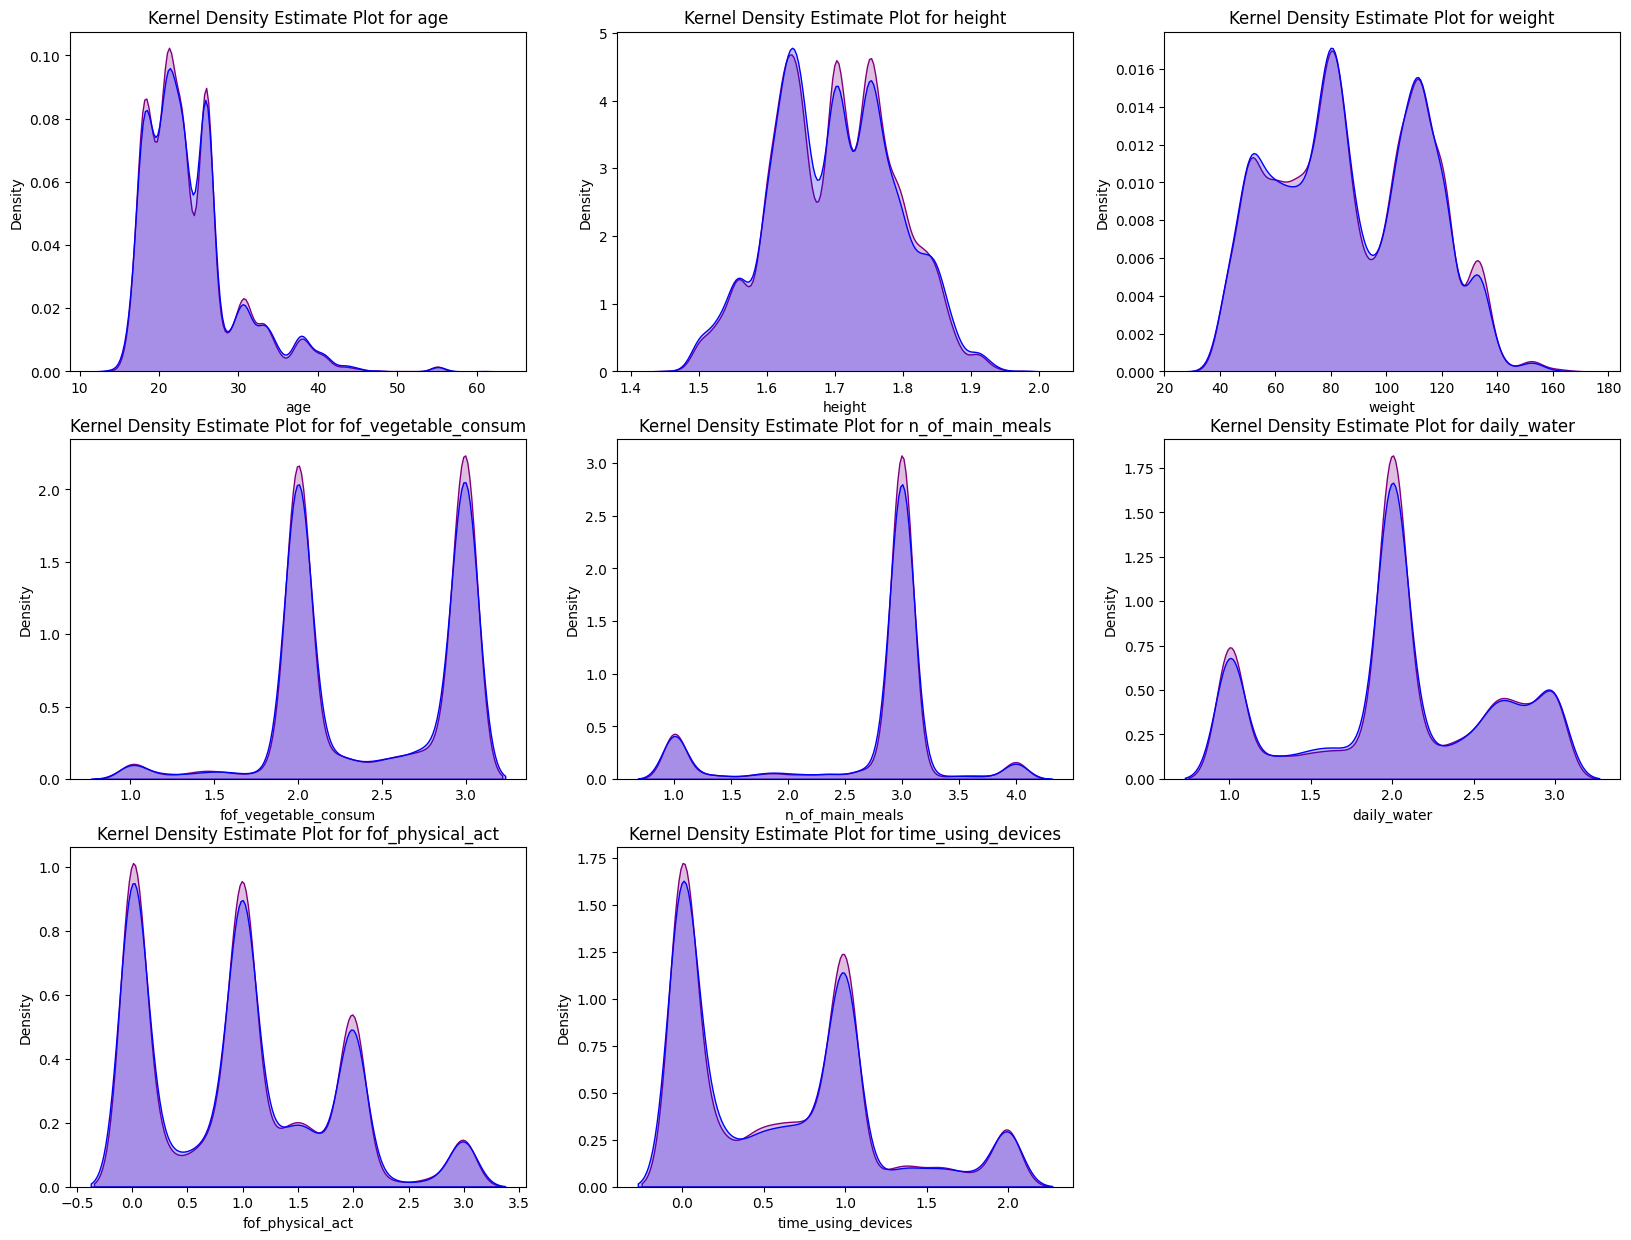

In [22]:
plot_kde_for_numerical(train)

In [23]:
def plot_kde_for_numerical(df):
    # Get the numerical columns
    numerical_columns = df.select_dtypes(include = "number").columns

    # Create a KDE plot for each numerical column except "id"
    plt.figure(figsize=(20, 15))
    x = 1
    for column in numerical_columns:
        if column == "id":
            pass
        else:
            plt.subplot(3, 3, x)
            sns.kdeplot(data=df, x = column, shade=True, color = "purple", hue = "target")
            plt.xlabel(column)
            plt.ylabel("Density")
            plt.title(f"Kernel Density Estimate Plot for {column}")
            x += 1
            
    plt.show()

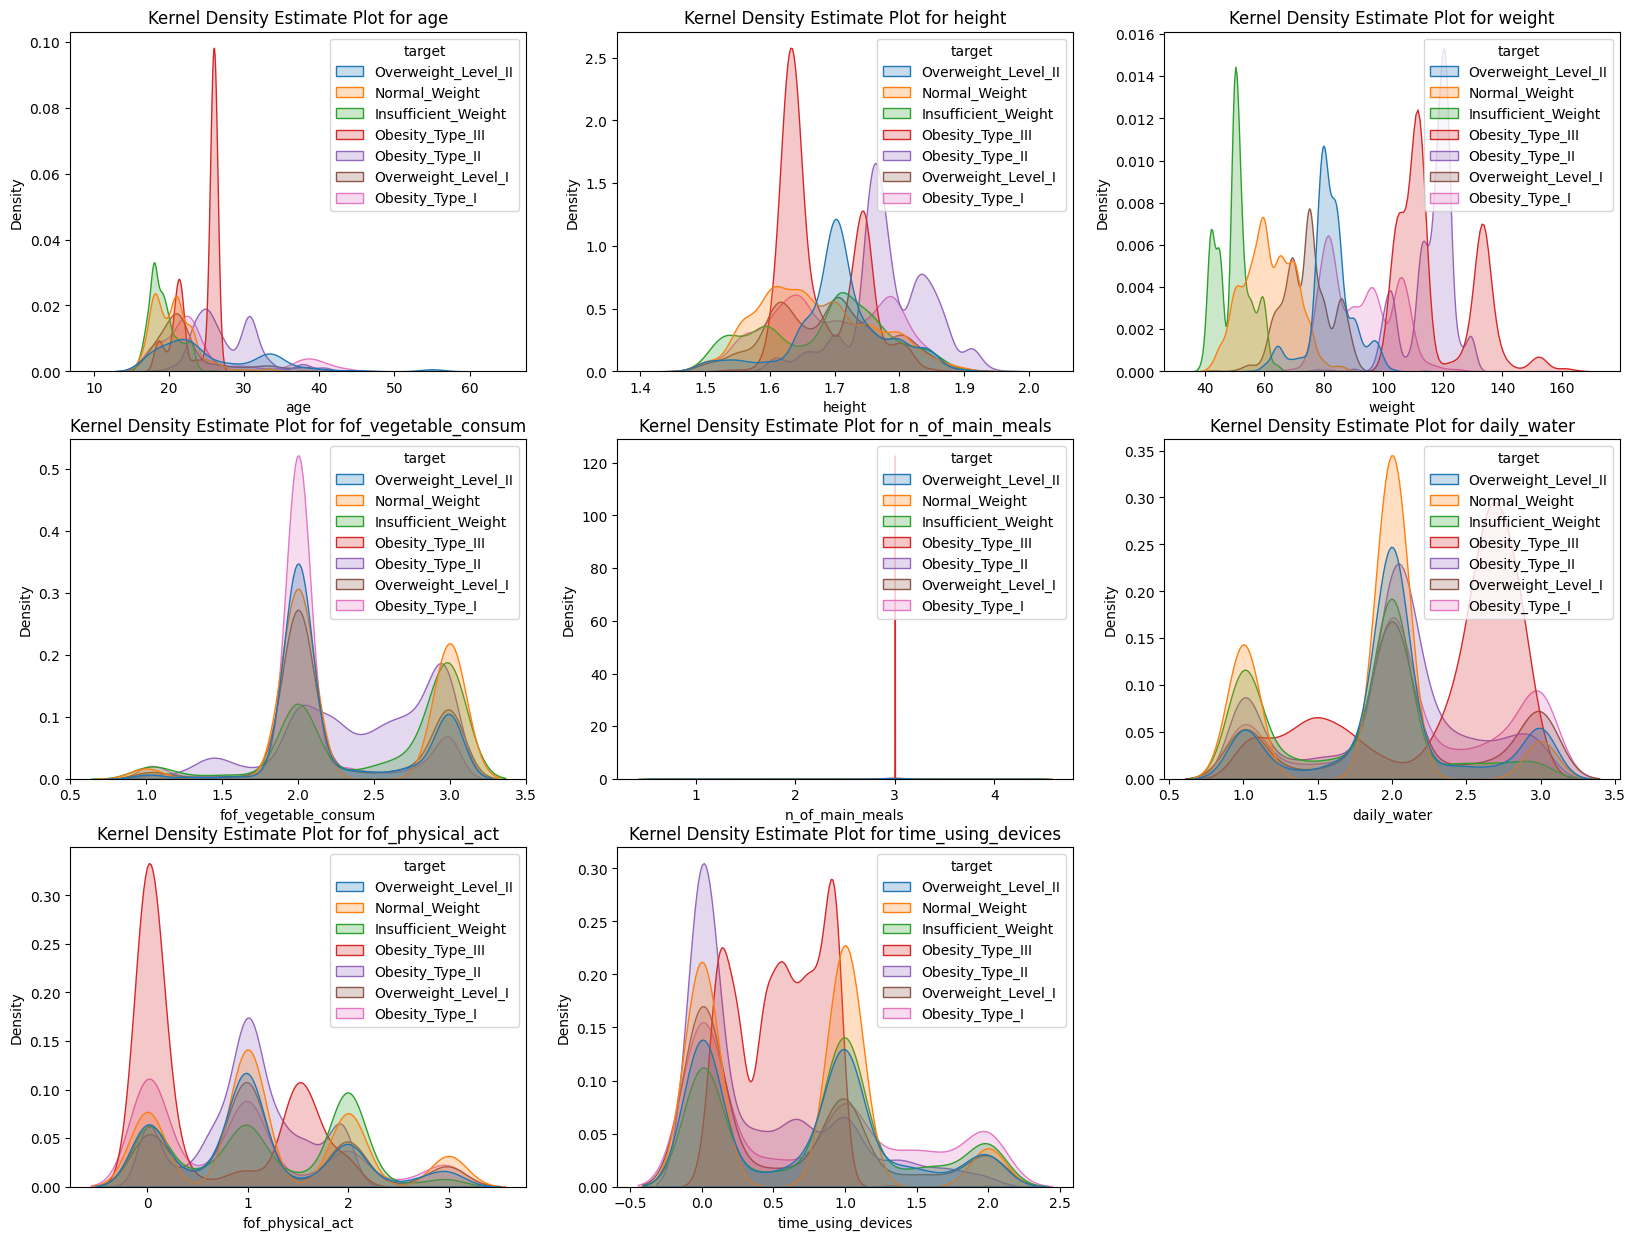

In [24]:
plot_kde_for_numerical(train)

In [25]:
train

,id,gender,age,height,weight,fam_overweight_hist,f_high_calory_consum,fof_vegetable_consum,n_of_main_meals,food_between_meals,smoke,daily_water,calorie_monitoring,fof_physical_act,time_using_devices,alcohol_consum,transportation,target
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [26]:
# create body mass index column
datasets = [train, test]
for df in datasets:
    df["bmi"] = df["weight"] / df["height"] ** 2

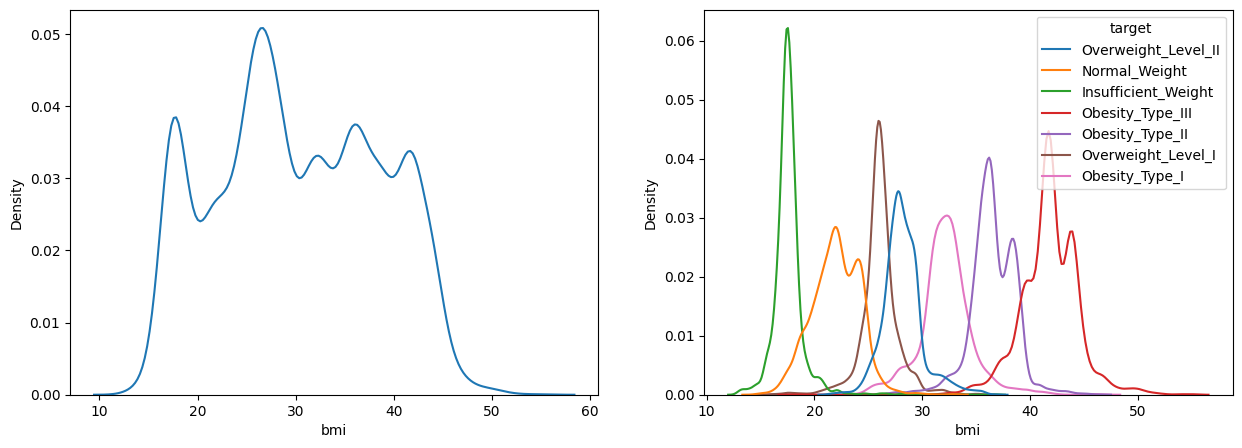

In [27]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(x = "bmi", data = train)
plt.subplot(1, 2, 2)
sns.kdeplot(x = "bmi", data = train, hue = "target")
plt.show()

In [28]:
def plot_box_for_categorical(df):
    # Get the categorical columns
    numerical_columns = df.select_dtypes(include = "object").columns

    # Create a box plot for each categorical column
    plt.figure(figsize=(25, 15))
    x = 1
    for column in numerical_columns:
            plt.subplot(4, 3, x)
            sns.boxplot(x = "bmi", data = df, y = column)
            plt.xlabel(None)
            plt.ylabel(None)
            plt.title(f"Box plot with bmi and {column}.")
            x += 1
            
    plt.show()

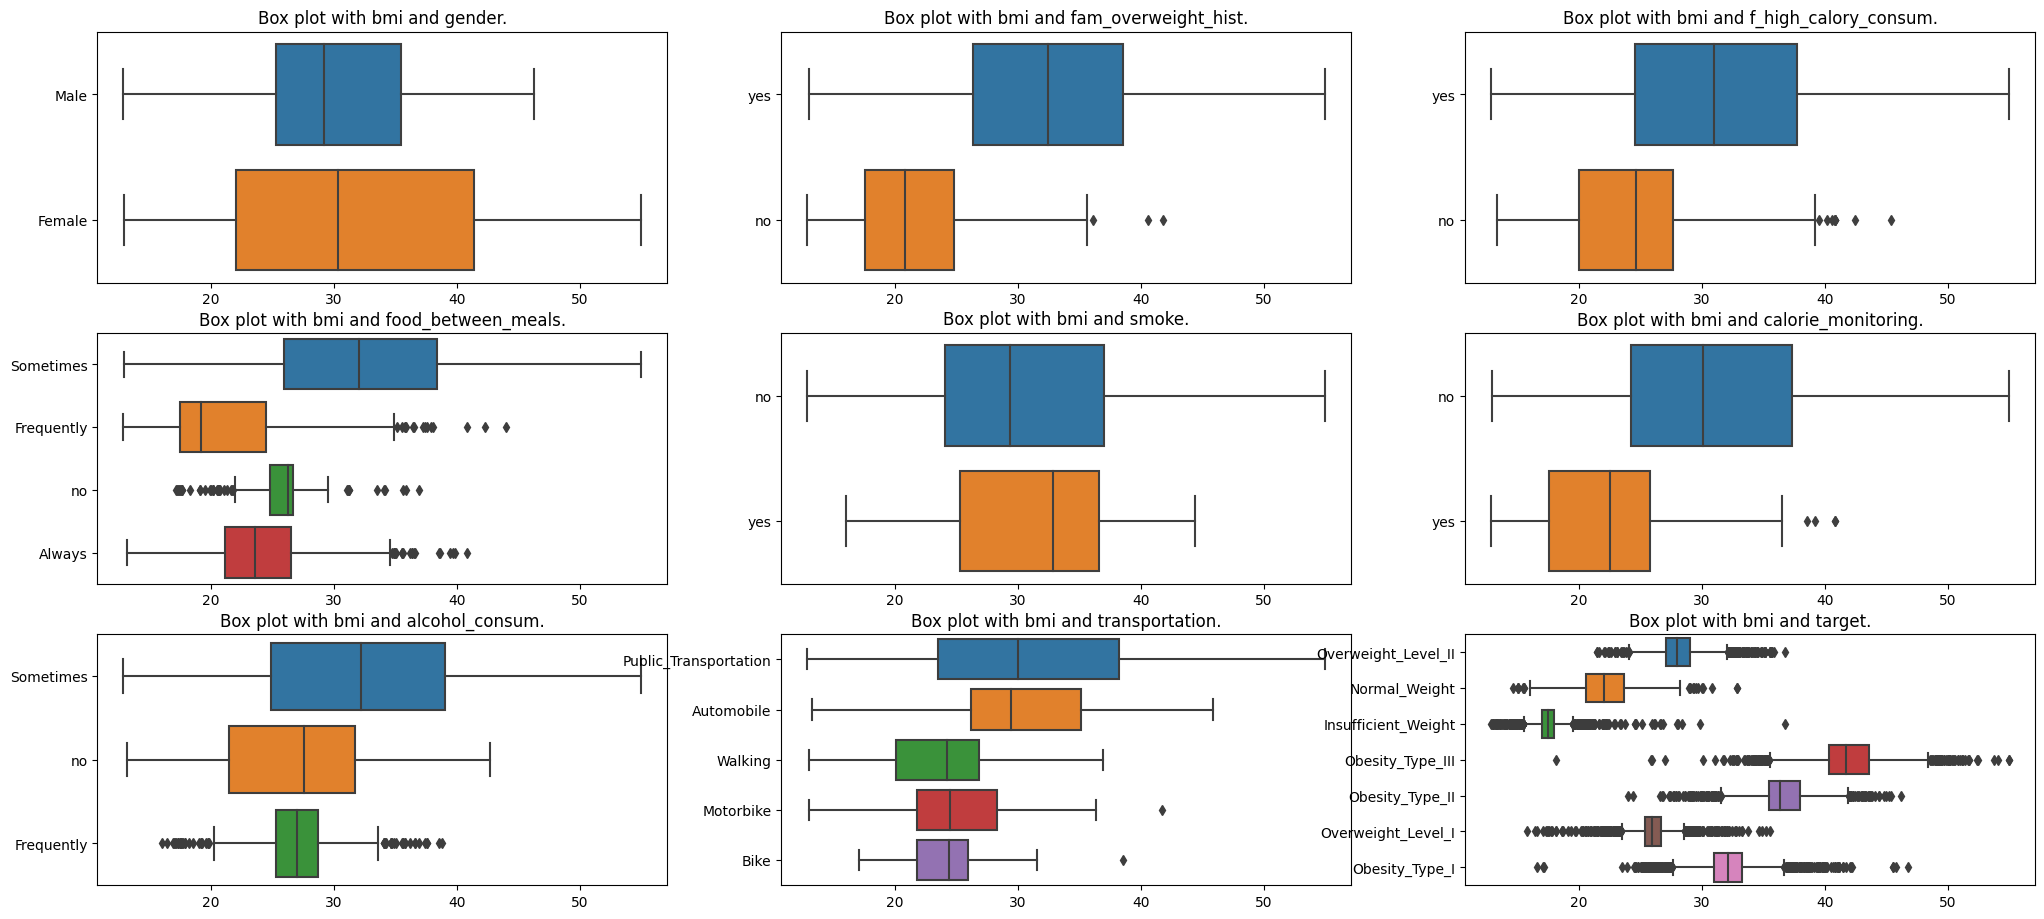

In [29]:
plot_box_for_categorical(train)

In [30]:
columns_to_transform = test.select_dtypes(include = "object").columns
datasets = [train, test]

for column in columns_to_transform:
    for df in datasets:
        print(df[column].unique())
    print("-"* 10 + "\n")

['Male' 'Female']
['Male' 'Female']
----------

['yes' 'no']
['yes' 'no']
----------

['yes' 'no']
['yes' 'no']
----------

['Sometimes' 'Frequently' 'no' 'Always']
['Sometimes' 'Always' 'Frequently' 'no']
----------

['no' 'yes']
['no' 'yes']
----------

['no' 'yes']
['no' 'yes']
----------

['Sometimes' 'no' 'Frequently']
['Sometimes' 'no' 'Frequently' 'Always']
----------

['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
----------



In [31]:
test["alcohol_consum"].value_counts()

alcohol_consum
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64

In [32]:
# change 2 instances of "Always" in test["alcohol_consum"] to "Frequently"
test.loc[test["alcohol_consum"] == "Always", "alcohol_consum"] = "Frequently"

In [33]:
test["alcohol_consum"].value_counts()

alcohol_consum
Sometimes     9979
no            3513
Frequently     348
Name: count, dtype: int64

In [34]:
# transform all categorical features to numerical
train_up = train.copy(deep = True)
test_up = test.copy(deep = True)
for column in columns_to_transform:
    le = LabelEncoder()
    train_up[column] = le.fit_transform(train[column])
    test_up[column] = le.transform(test[column])

In [35]:
test_up

,id,gender,age,height,weight,fam_overweight_hist,f_high_calory_consum,fof_vegetable_consum,n_of_main_meals,food_between_meals,smoke,daily_water,calorie_monitoring,fof_physical_act,time_using_devices,alcohol_consum,transportation,bmi
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,1,3,35.315411
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,1,3,25.781250
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,1,3,41.324115
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,1,3,42.976937
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,1,3,39.584143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,2,0,1.000000,0,0.807076,0.778632,1,3,26.333478
13836,34594,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,2,0,2.000000,0,0.000000,0.000000,1,3,24.524346
13837,34595,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,1,0,2.000000,0,1.949840,1.000000,1,3,17.652091
13838,34596,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,2,0,2.000000,0,3.000000,2.000000,2,3,20.195092


In [36]:
y = train_up["target"]
X = train_up[["gender", "age", "height", "weight", "fam_overweight_hist", "f_high_calory_consum", "fof_vegetable_consum", "n_of_main_meals", "smoke", "daily_water", "calorie_monitoring",
             "fof_physical_act", "time_using_devices", "alcohol_consum", "transportation", "bmi"]]

In [37]:
# Compare model to see how various different models perform with default parameters
def get_classifiers_scores(X, y):
    models = [RandomForestClassifier(random_state = 42), 
                   GradientBoostingClassifier(random_state = 42), 
                   AdaBoostClassifier(random_state = 42), 
                   BaggingClassifier(random_state = 42),
                   ExtraTreesClassifier(random_state = 42),
                   HistGradientBoostingClassifier(random_state = 42),
                   DecisionTreeClassifier(random_state = 42),
                   SVC(random_state = 42)]
    classifiers = ["RandomForestClassifier",
                   "GradientBoostingClassifier",
                   "AdaBoostClassifier",
                   "BaggingClassifier",
                   "ExtraTreesClassifier",
                   "HistGradientBoostingClassifier",
                   "DecisionTreeClassifier",
                   "SVC"]

    cv_mean = []
    cv_std = []

    for model in models:
        model = model
        cv = cross_val_score(model,X,y,cv=3)
        cv_std.append(cv.std())
        cv_mean.append(cv.mean())

    cv_dataframe = pd.DataFrame({"CV Mean": cv_mean,"Std": cv_std}, index = classifiers)       
    cv_dataframe = cv_dataframe.sort_values(by = ["CV Mean"], ascending = False)
    return cv_dataframe

In [38]:
get_classifiers_scores(X, y)

,CV Mean,Std
HistGradientBoostingClassifier,0.901050,0.000292
GradientBoostingClassifier,0.898882,0.001578
RandomForestClassifier,0.898256,0.003786
ExtraTreesClassifier,0.892668,0.000450
BaggingClassifier,0.878938,0.004352
DecisionTreeClassifier,0.838135,0.003374
SVC,0.822285,0.003424
AdaBoostClassifier,0.565756,0.117904


In [39]:
full_data_model = HistGradientBoostingClassifier(random_state=42)
full_data_model.fit(X, y)
test_pred = full_data_model.predict(test_up[["gender", "age", "height", "weight", "fam_overweight_hist", "f_high_calory_consum", "fof_vegetable_consum", "n_of_main_meals", "smoke", "daily_water", "calorie_monitoring",
             "fof_physical_act", "time_using_devices", "alcohol_consum", "transportation", "bmi"]])

In [40]:
output = pd.DataFrame({"id": test_up.id,
                      "NObeyesdad": test_pred})
output.to_csv('/kaggle/working/submission.csv', index=False)

## Public scores of top 4 best performing models

- Public score of HistGradientBoostingClassifier = **0.90462**
- Public score of GradientBoostingClassifier = 0.90173
- Public score of RandomForestClassifier = 0.89920
- Public score of ExtraTreesClassifier =  0.89523

## What could be done to improve the score?

- Hyper tuning
- More feature engineering
- Voting / stacking models